# I'll still explain the goal of the project

#### Importing the necessary libraries

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import seaborn as sns

#### Reading data

In [2]:
ceara = pd.read_csv("ceara.csv", header=1) # remove the first unuseful line
ceara.head()

,Mês,Flamengo: (Ceará),Fortaleza Esporte Clube: (Ceará),Ceará Sporting Club: (Ceará)
0,2004-01,0,0,20
1,2004-02,0,0,19
2,2004-03,0,0,22
3,2004-04,5,7,21
4,2004-05,3,3,23


In [3]:
pernambuco = pd.read_csv("pernambuco.csv", header=1)
pernambuco.head(25)

,Mês,Santa Cruz Futebol Clube: (Pernambuco),Sport Club do Recife: (Pernambuco),Clube de Regatas do Flamengo: (Pernambuco),Clube Náutico Capibaribe: (Pernambuco)
0,2004-01,0,0,0,0
1,2004-02,0,0,0,0
2,2004-03,0,0,0,0
3,2004-04,0,0,0,0
4,2004-05,0,0,0,0
5,2004-06,0,0,0,0
6,2004-07,0,0,6,14
7,2004-08,0,0,0,0
8,2004-09,0,0,0,0
9,2004-10,0,7,0,0


##### Note that the pernambuco's data is very incosistent in the years 2004 and 2005. So I'll remove these two years from both datasets in order to avoid issues

#### Removing 2004 and 2005

In [4]:
ceara = ceara[ceara["Mês"] >= "2006-01"]
ceara.head()

,Mês,Flamengo: (Ceará),Fortaleza Esporte Clube: (Ceará),Ceará Sporting Club: (Ceará)
24,2006-01,5,4,23
25,2006-02,4,5,19
26,2006-03,3,4,20
27,2006-04,3,6,19
28,2006-05,6,4,15


In [5]:
pernambuco = pernambuco[pernambuco["Mês"] >= "2006-01"]
pernambuco.head()

,Mês,Santa Cruz Futebol Clube: (Pernambuco),Sport Club do Recife: (Pernambuco),Clube de Regatas do Flamengo: (Pernambuco),Clube Náutico Capibaribe: (Pernambuco)
24,2006-01,0,3,5,2
25,2006-02,0,2,4,2
26,2006-03,2,3,2,2
27,2006-04,1,6,3,4
28,2006-05,2,4,3,3


#### Cleaning data and renaming columns

In [6]:
# cleaning data

ceara["Mês"] = pd.to_datetime(ceara["Mês"])
pernambuco["Mês"] = pd.to_datetime(pernambuco["Mês"])

ceara.set_index("Mês", inplace=True)
ceara.columns = ["Clube de Regatas do Flamengo", "Fortaleza Esporte Clube", "Ceará Sporting Club"]

pernambuco.set_index("Mês", inplace=True)
pernambuco.columns = ["Santa Cruz Futebol Clube", "Sport Club do Recife", "Clube de Regatas do Flamengo", "Náutico Clube Capibaribe"]
pernambuco.head()

,Santa Cruz Futebol Clube,Sport Club do Recife,Clube de Regatas do Flamengo,Náutico Clube Capibaribe
Mês,,,,
2006-01-01,0,3,5,2
2006-02-01,0,2,4,2
2006-03-01,2,3,2,2
2006-04-01,1,6,3,4
2006-05-01,2,4,3,3


#### Turning the numbers in the datasets into the % of search instead of numbers that do not make sense

In [13]:
# creating a sum column
ceara["Soma"] = ceara[["Clube de Regatas do Flamengo", "Fortaleza Esporte Clube", "Ceará Sporting Club"]].sum(axis=1)
pernambuco["Soma"] = pernambuco[["Santa Cruz Futebol Clube", "Sport Club do Recife", "Clube de Regatas do Flamengo", "Náutico Clube Capibaribe"]].sum(axis=1)

for df in [ceara, pernambuco]:
    for col in df.columns:
        df[col] = df[col] / df["Soma"] * 100 
    df.drop("Soma", axis=1, inplace=True) # removing the sum column

ceara.head()

,Clube de Regatas do Flamengo,Fortaleza Esporte Clube,Ceará Sporting Club
Mês,,,
2006-01-01,15.625000,12.500000,71.875000
2006-02-01,14.285714,17.857143,67.857143
2006-03-01,11.111111,14.814815,74.074074
2006-04-01,10.714286,21.428571,67.857143
2006-05-01,24.000000,16.000000,60.000000


#### Creating a plot showing the search trend between each club from Ceara and Flamengo over the years

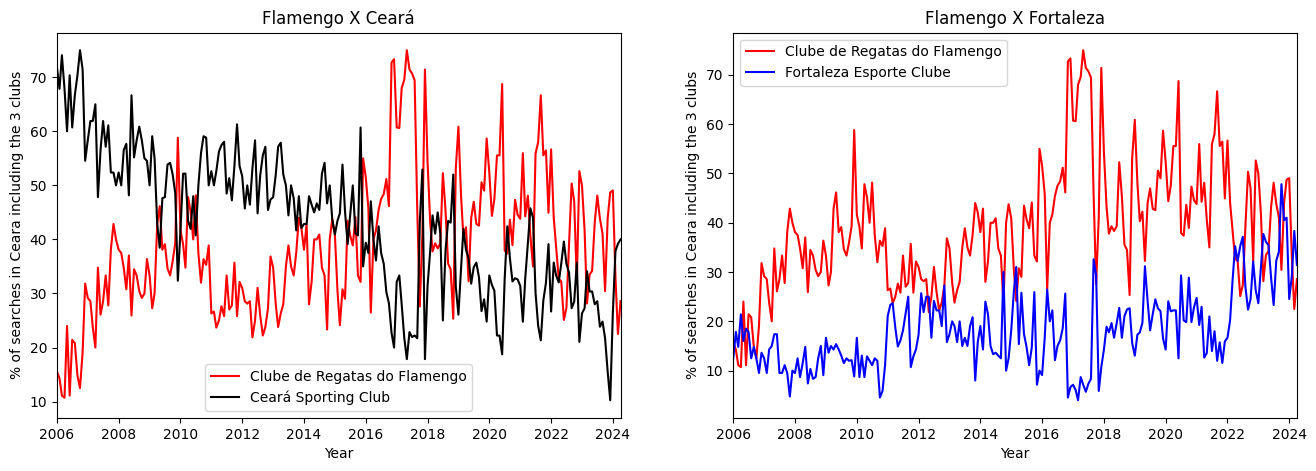

In [57]:
ceara_flamengo = ceara.drop("Fortaleza Esporte Clube", axis=1) # creating a df with only ceara and flamengo
fortaleza_flamengo = ceara.drop("Ceará Sporting Club", axis=1) # creating a df with only fortaleza and flamengo
plt.figure(figsize=(16, 5))

# setting the min and max dates
min_date = min(ceara_flamengo.index.min(), fortaleza_flamengo.index.min())
max_date = max(ceara_flamengo.index.max(), fortaleza_flamengo.index.max())

plt.subplot(1, 2, 1)
plt.plot(ceara_flamengo["Clube de Regatas do Flamengo"], label="Clube de Regatas do Flamengo", color='red') # flamengo will be color red
plt.plot(ceara_flamengo["Ceará Sporting Club"], label="Ceará Sporting Club", color='black') # ceara will be color black
plt.title("Flamengo X Ceará")
plt.xlabel("Year")
plt.ylabel("% of searches in Ceara including the 3 clubs") # the values will not sum 100%
plt.legend(ceara_flamengo.columns)
plt.xlim(min_date, max_date) # in order to avoid unecessary whitespace

plt.subplot(1, 2, 2)
plt.plot(fortaleza_flamengo["Clube de Regatas do Flamengo"], label="Clube de Regatas do Flamengo", color='red') # flamengo will be color red
plt.plot(fortaleza_flamengo["Fortaleza Esporte Clube"], label="Fortaleza Esporte Clube", color='blue') # fortaleza will be color blue
plt.title("Flamengo X Fortaleza")
plt.xlabel("Year")
plt.ylabel("% of searches in Ceara including the 3 clubs") # the values will not sum 100%
plt.legend(fortaleza_flamengo.columns)
plt.xlim(min_date, max_date); # in order to avoid unecessary whitespace

# it is important to plot the columns one at time in order to specify its color, if it weren't for this, the colors would be blue and orange on both plots,
# making difficult to differentiate fortaleza and ceara which would have the same color

#### Creating a plot showing the search trend between each club from Pernambuco and Flamengo over the years

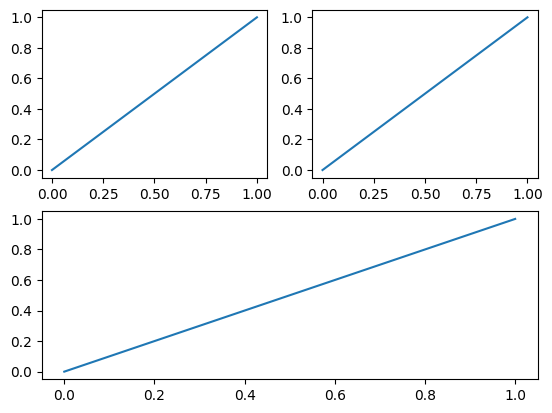

In [64]:
sport_flamengo = pernambuco.drop(["Clube Náutico Capibaribe", "Santa Cruz Futebol Clube"], axis=1)
santa_flamengo = pernambuco.drop(["Sport Club do Recife", "Clube Náutico Capibaribe"], axis=1)
nautico_flamengo = pernambuco.drop(["Sport Club do Recife", "Santa Cruz Futebol Clube"], axis=1)

min_date = min(sport_flamengo.index.min(), santa_flamengo.index.min(), nautico_flamengo.index.min())
max_date = max(sport_flamengo.index.max(), santa_flamengo.index.max(), nautico_flamengo.index.max())

gs = gridspec.GridSpec(2, 2)

pl.figure()

ax = pl.subplot(gs[0, 0])
pl.plot([0, 1])

ax = pl.subplot(gs[0, 1])
pl.plot([0, 1])

ax = pl.subplot(gs[1, :])
pl.plot([0, 1])